# BLG454E Learning From Data Homework 1

#### You are given several problems below. Some of them are to be solved on a paper and uploaded as an image file while the rest are coding problems. Make sure to keep your answers illustrative and show your work clearly. If you have any questions, send an e-mail at sentop22@itu.edu.tr.

# Hand-Solving Problems (40 points)

### These problems should be solved on an actual paper with your hand writing. Show your steps clearly.

## Problem 1 (20 points)

1. Define machine learning and explain the difference between supervised, unsupervised, and reinforcement learning. Give example applications of each. (5 points)
2. Differentiate between the training and testing phases in supervised learning. (5 points)
3. Describe the basic idea of linear regression and its applications. (5 points)
4. Given the set of data points below, calculate the coefficients (slope and intercept) of a simple linear regression model by hand. (5 points)

    Data points: {(2,5), (3,8), (4,7), (5,10), (6,12), (7,14), (8,15)}

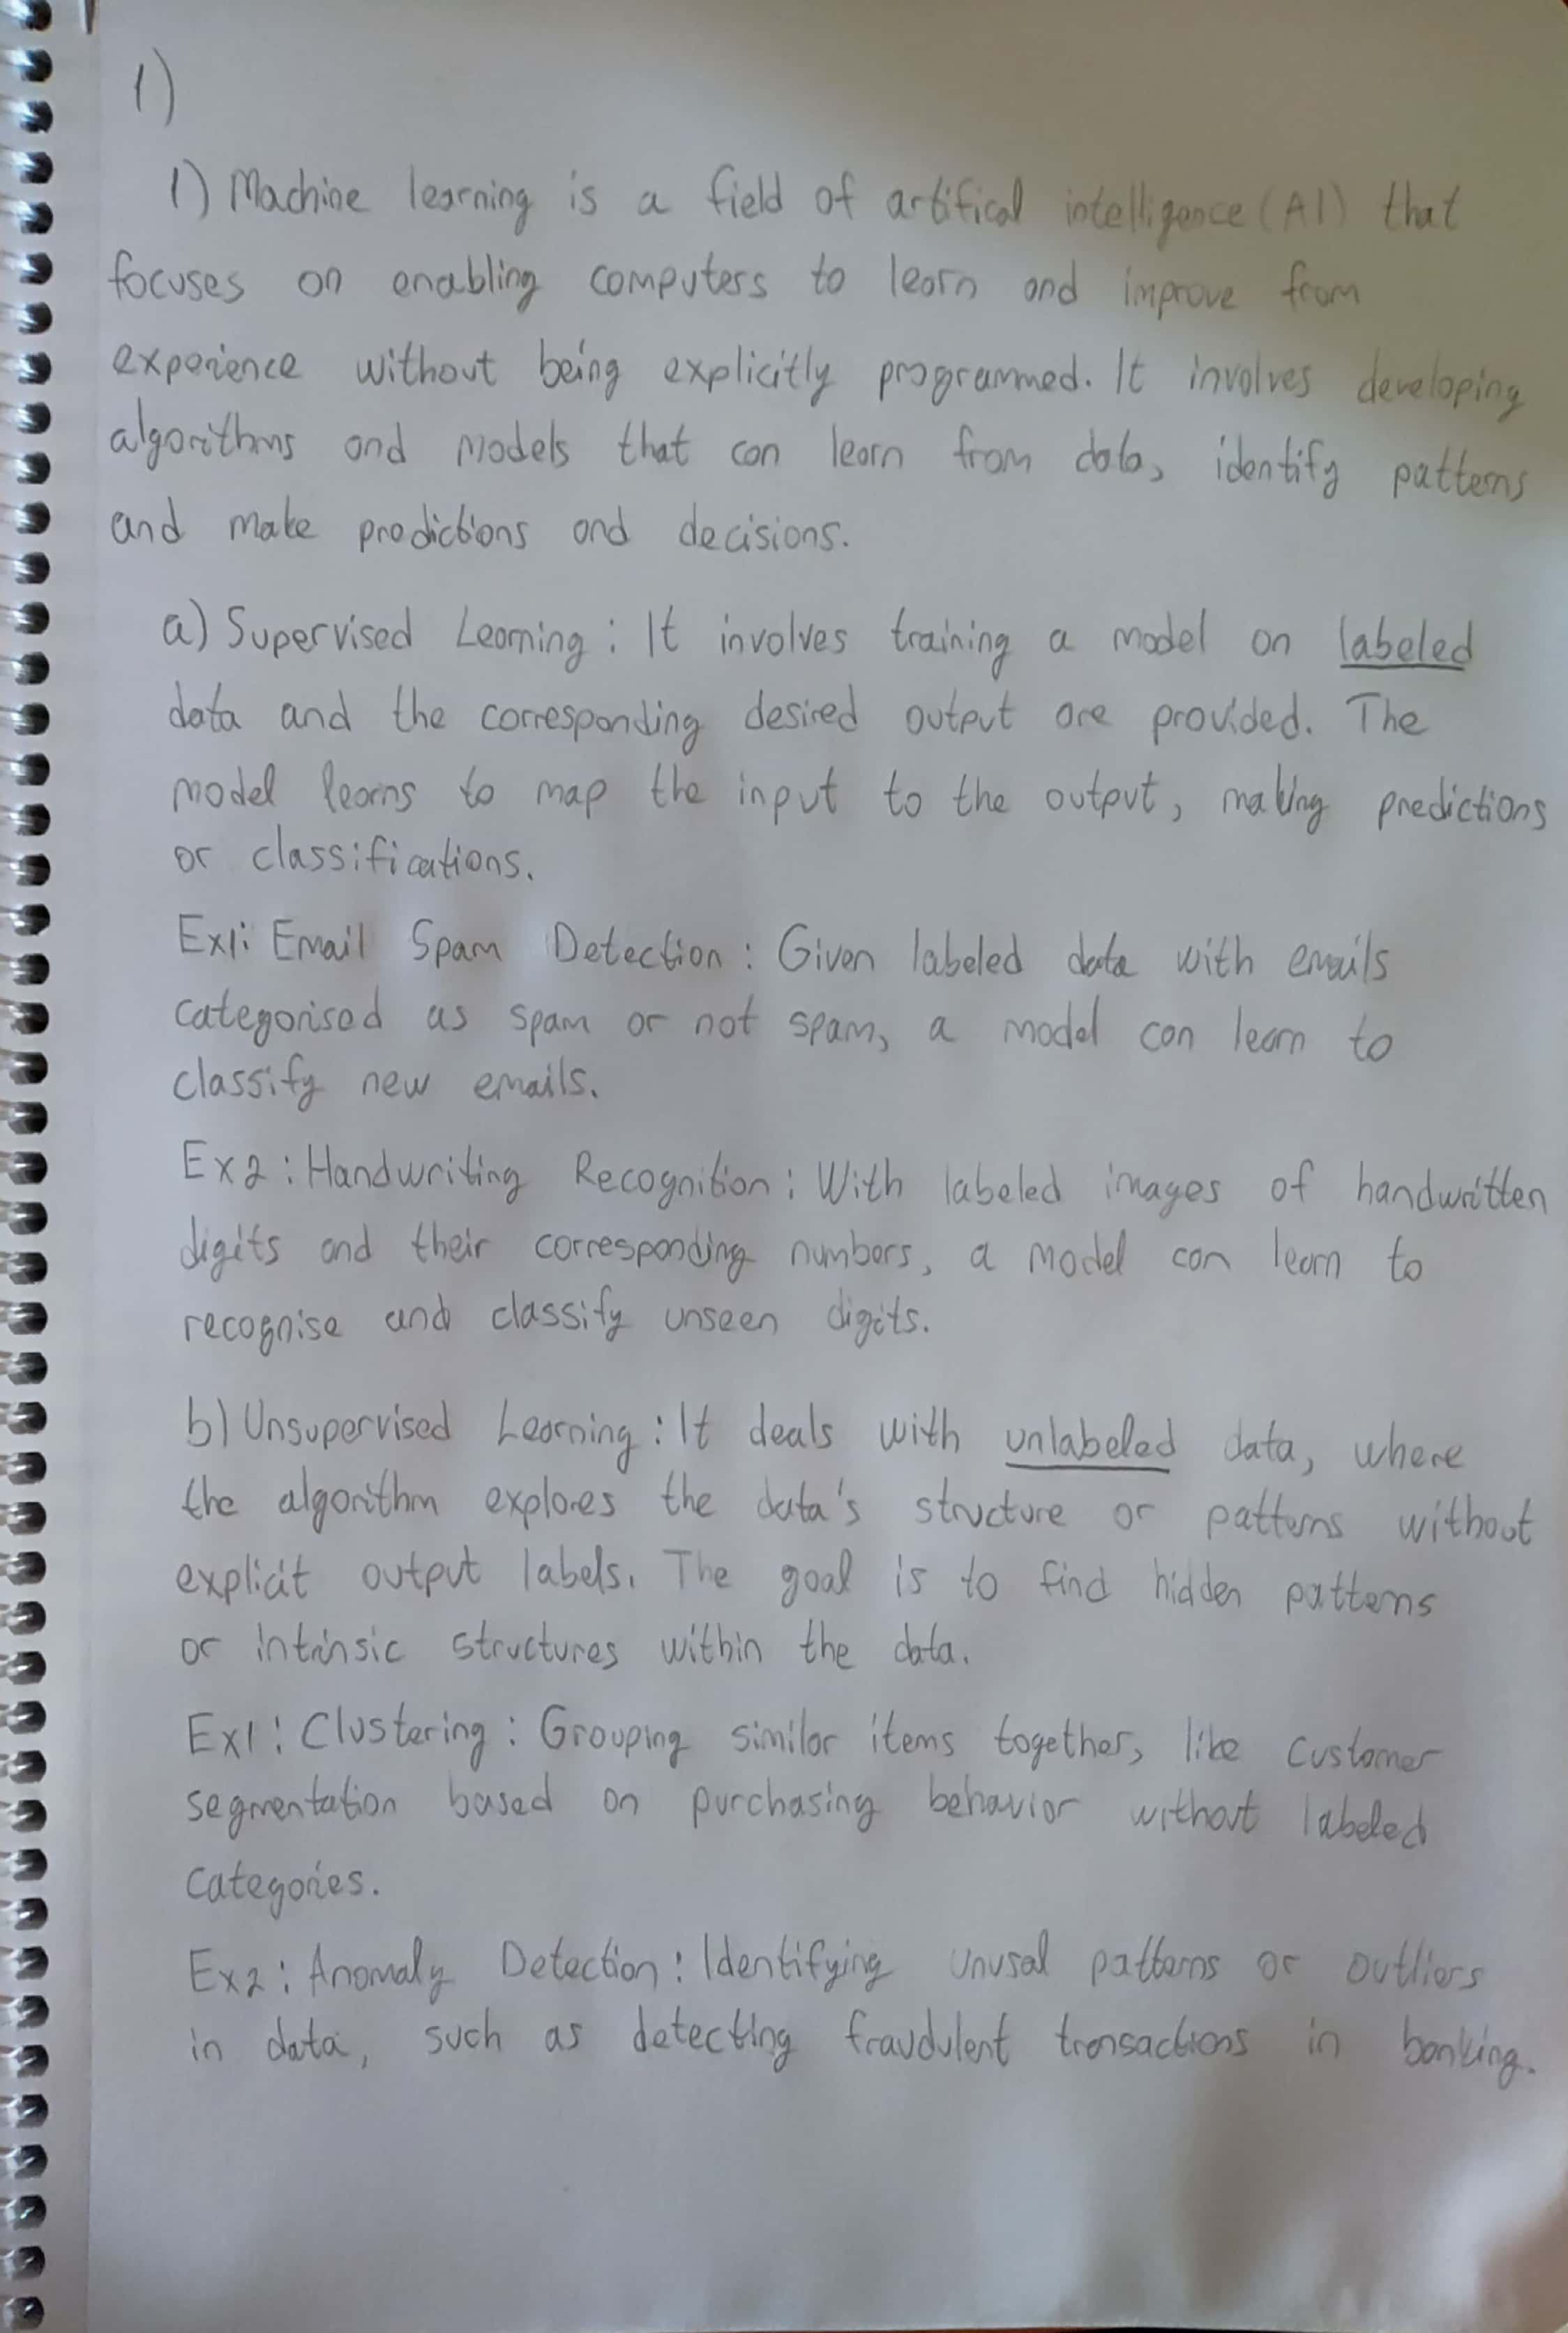

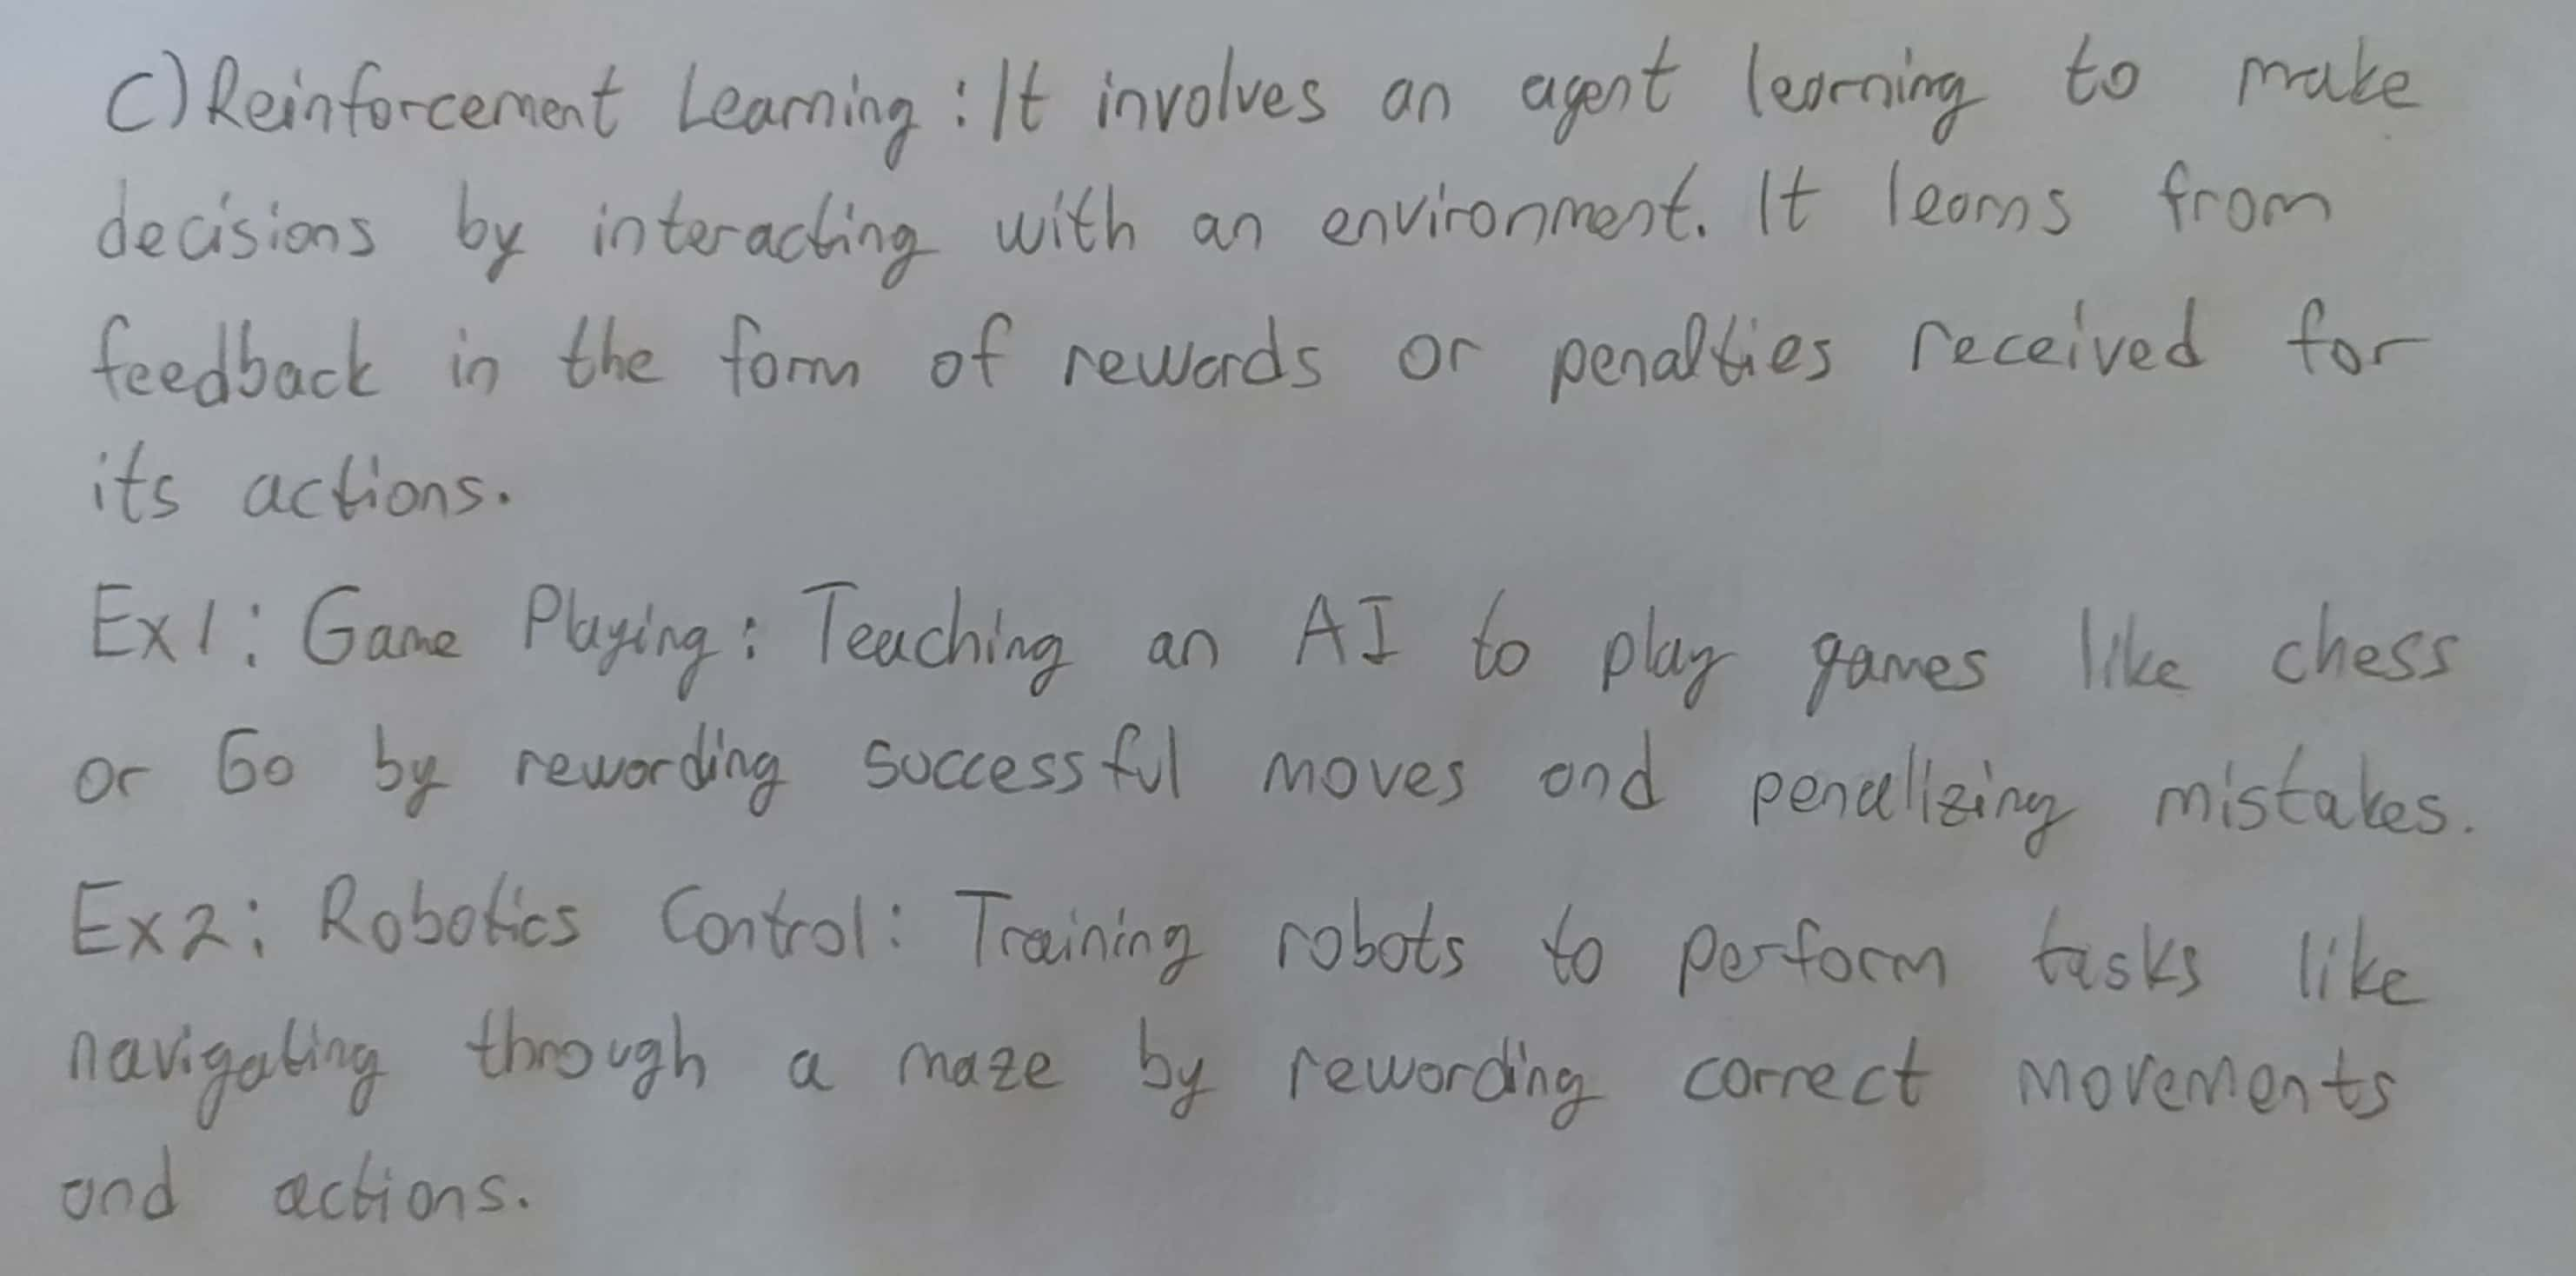

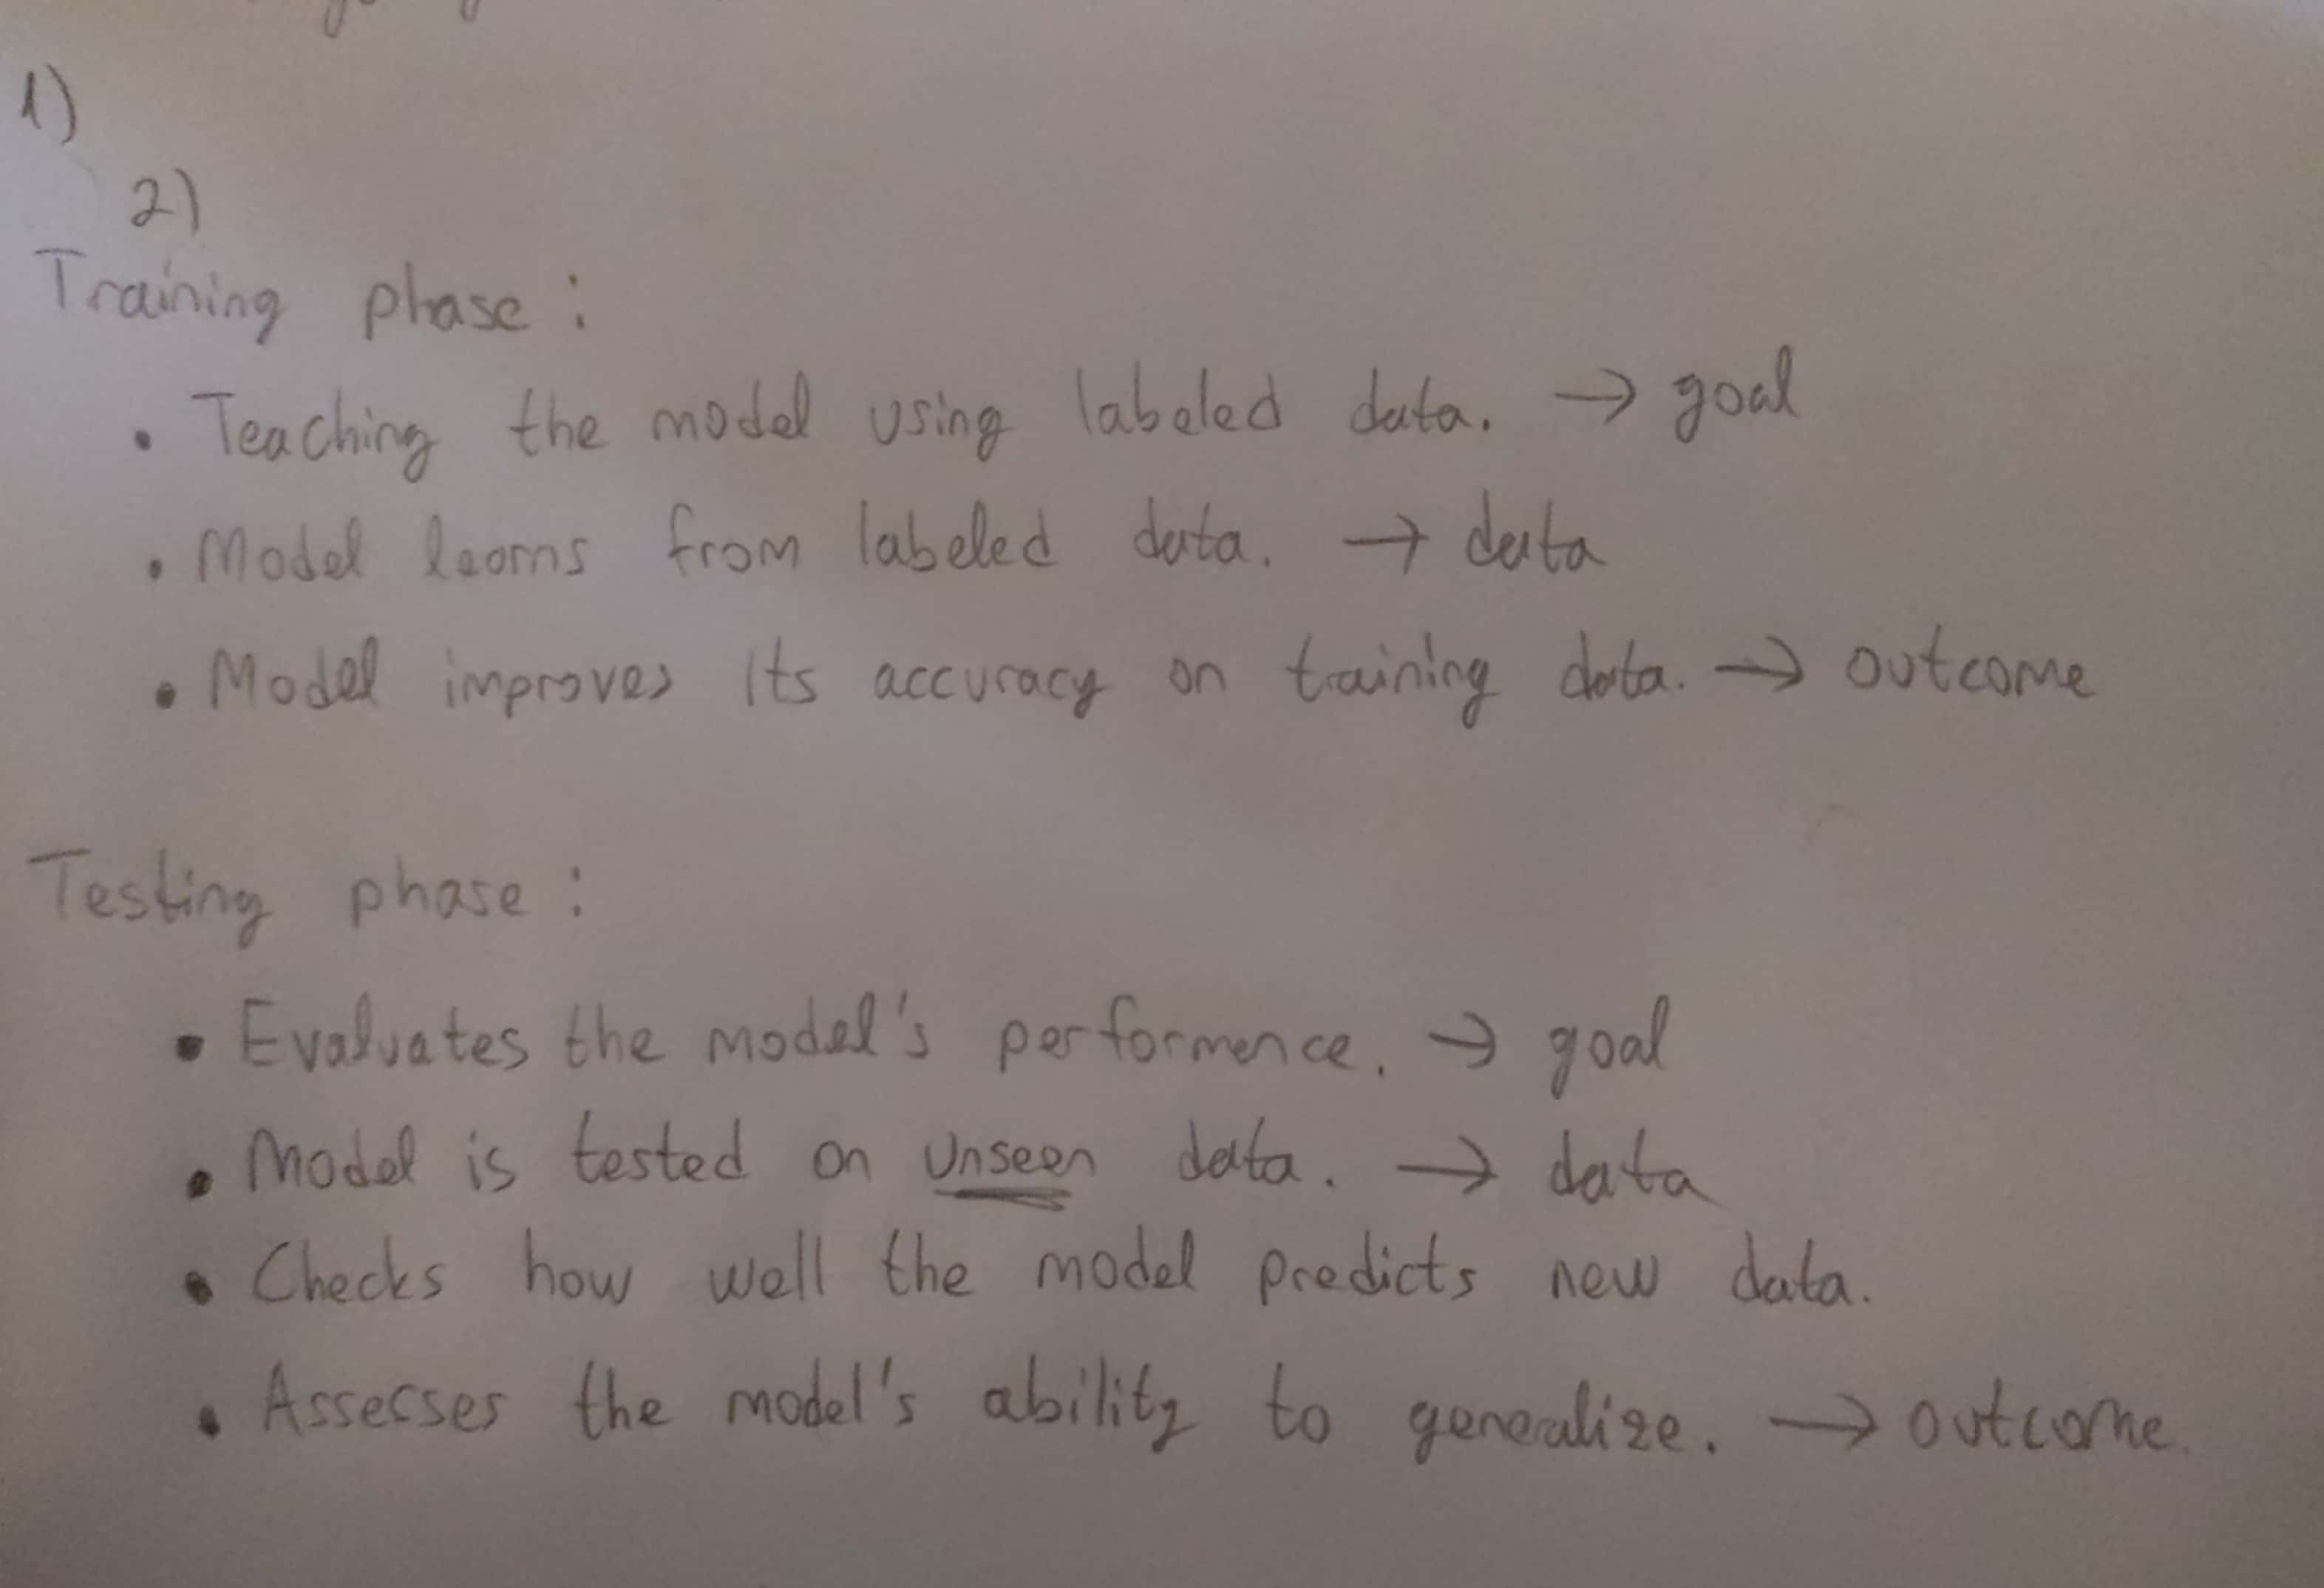

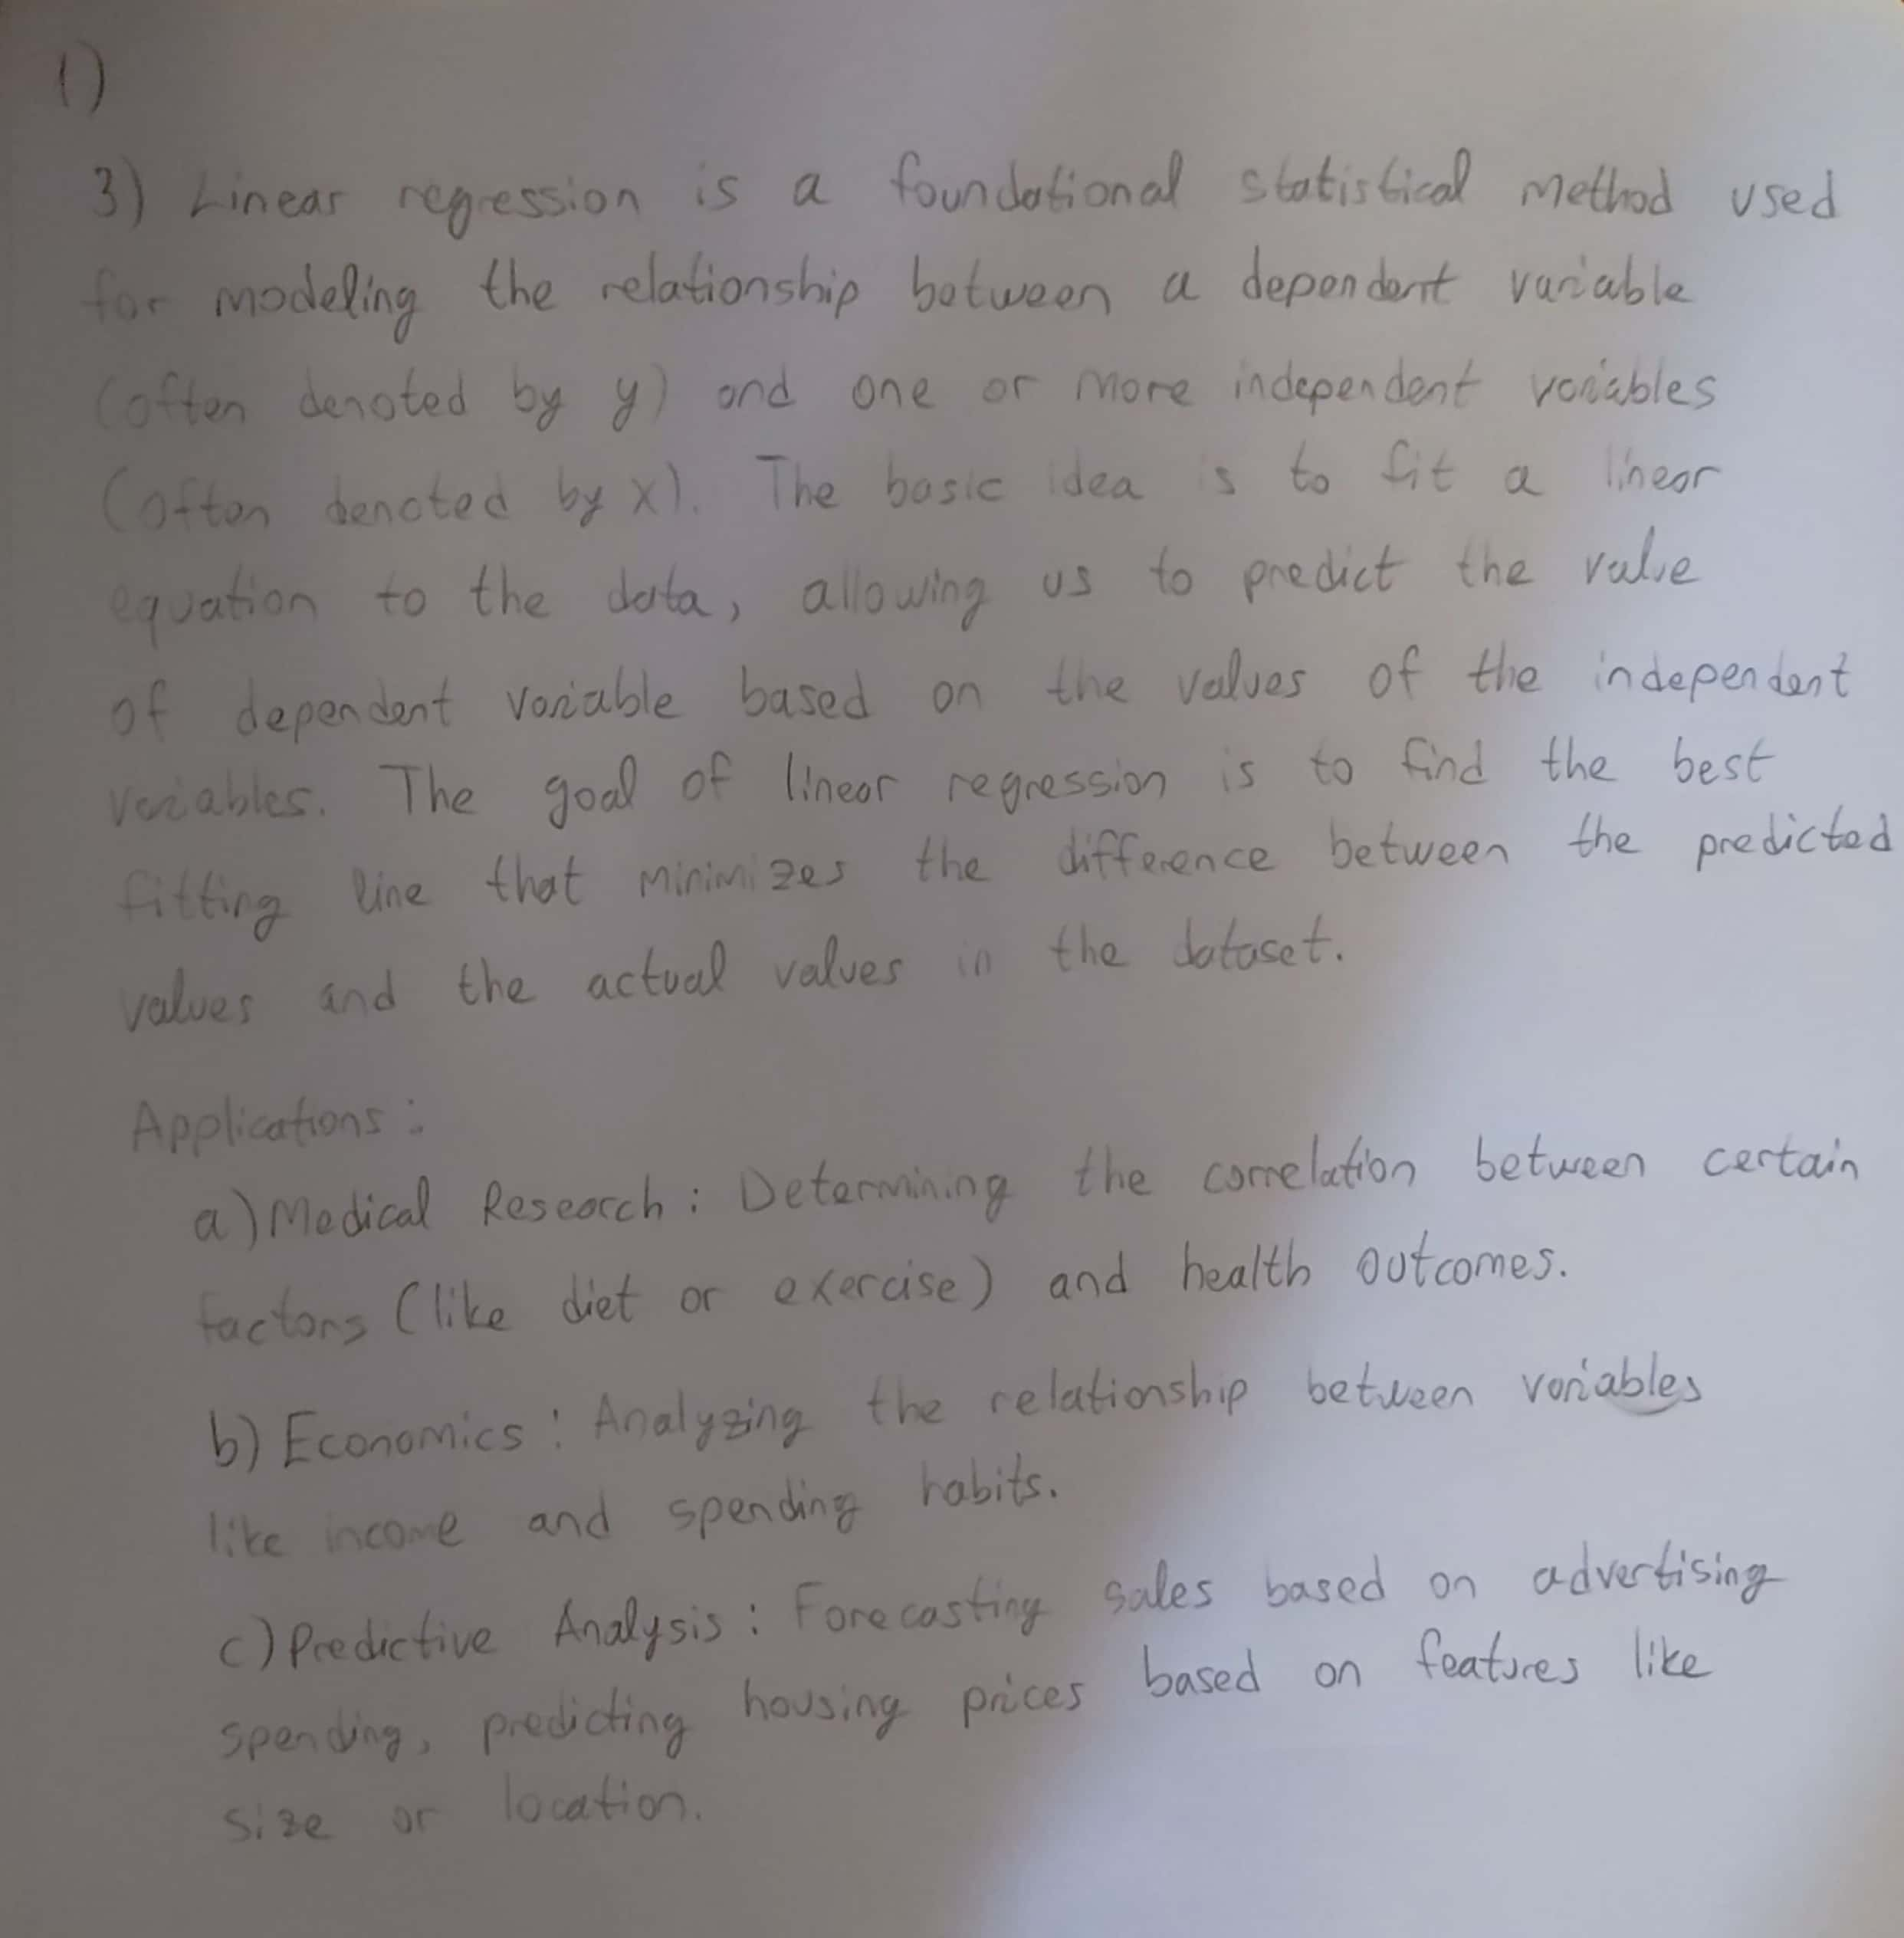

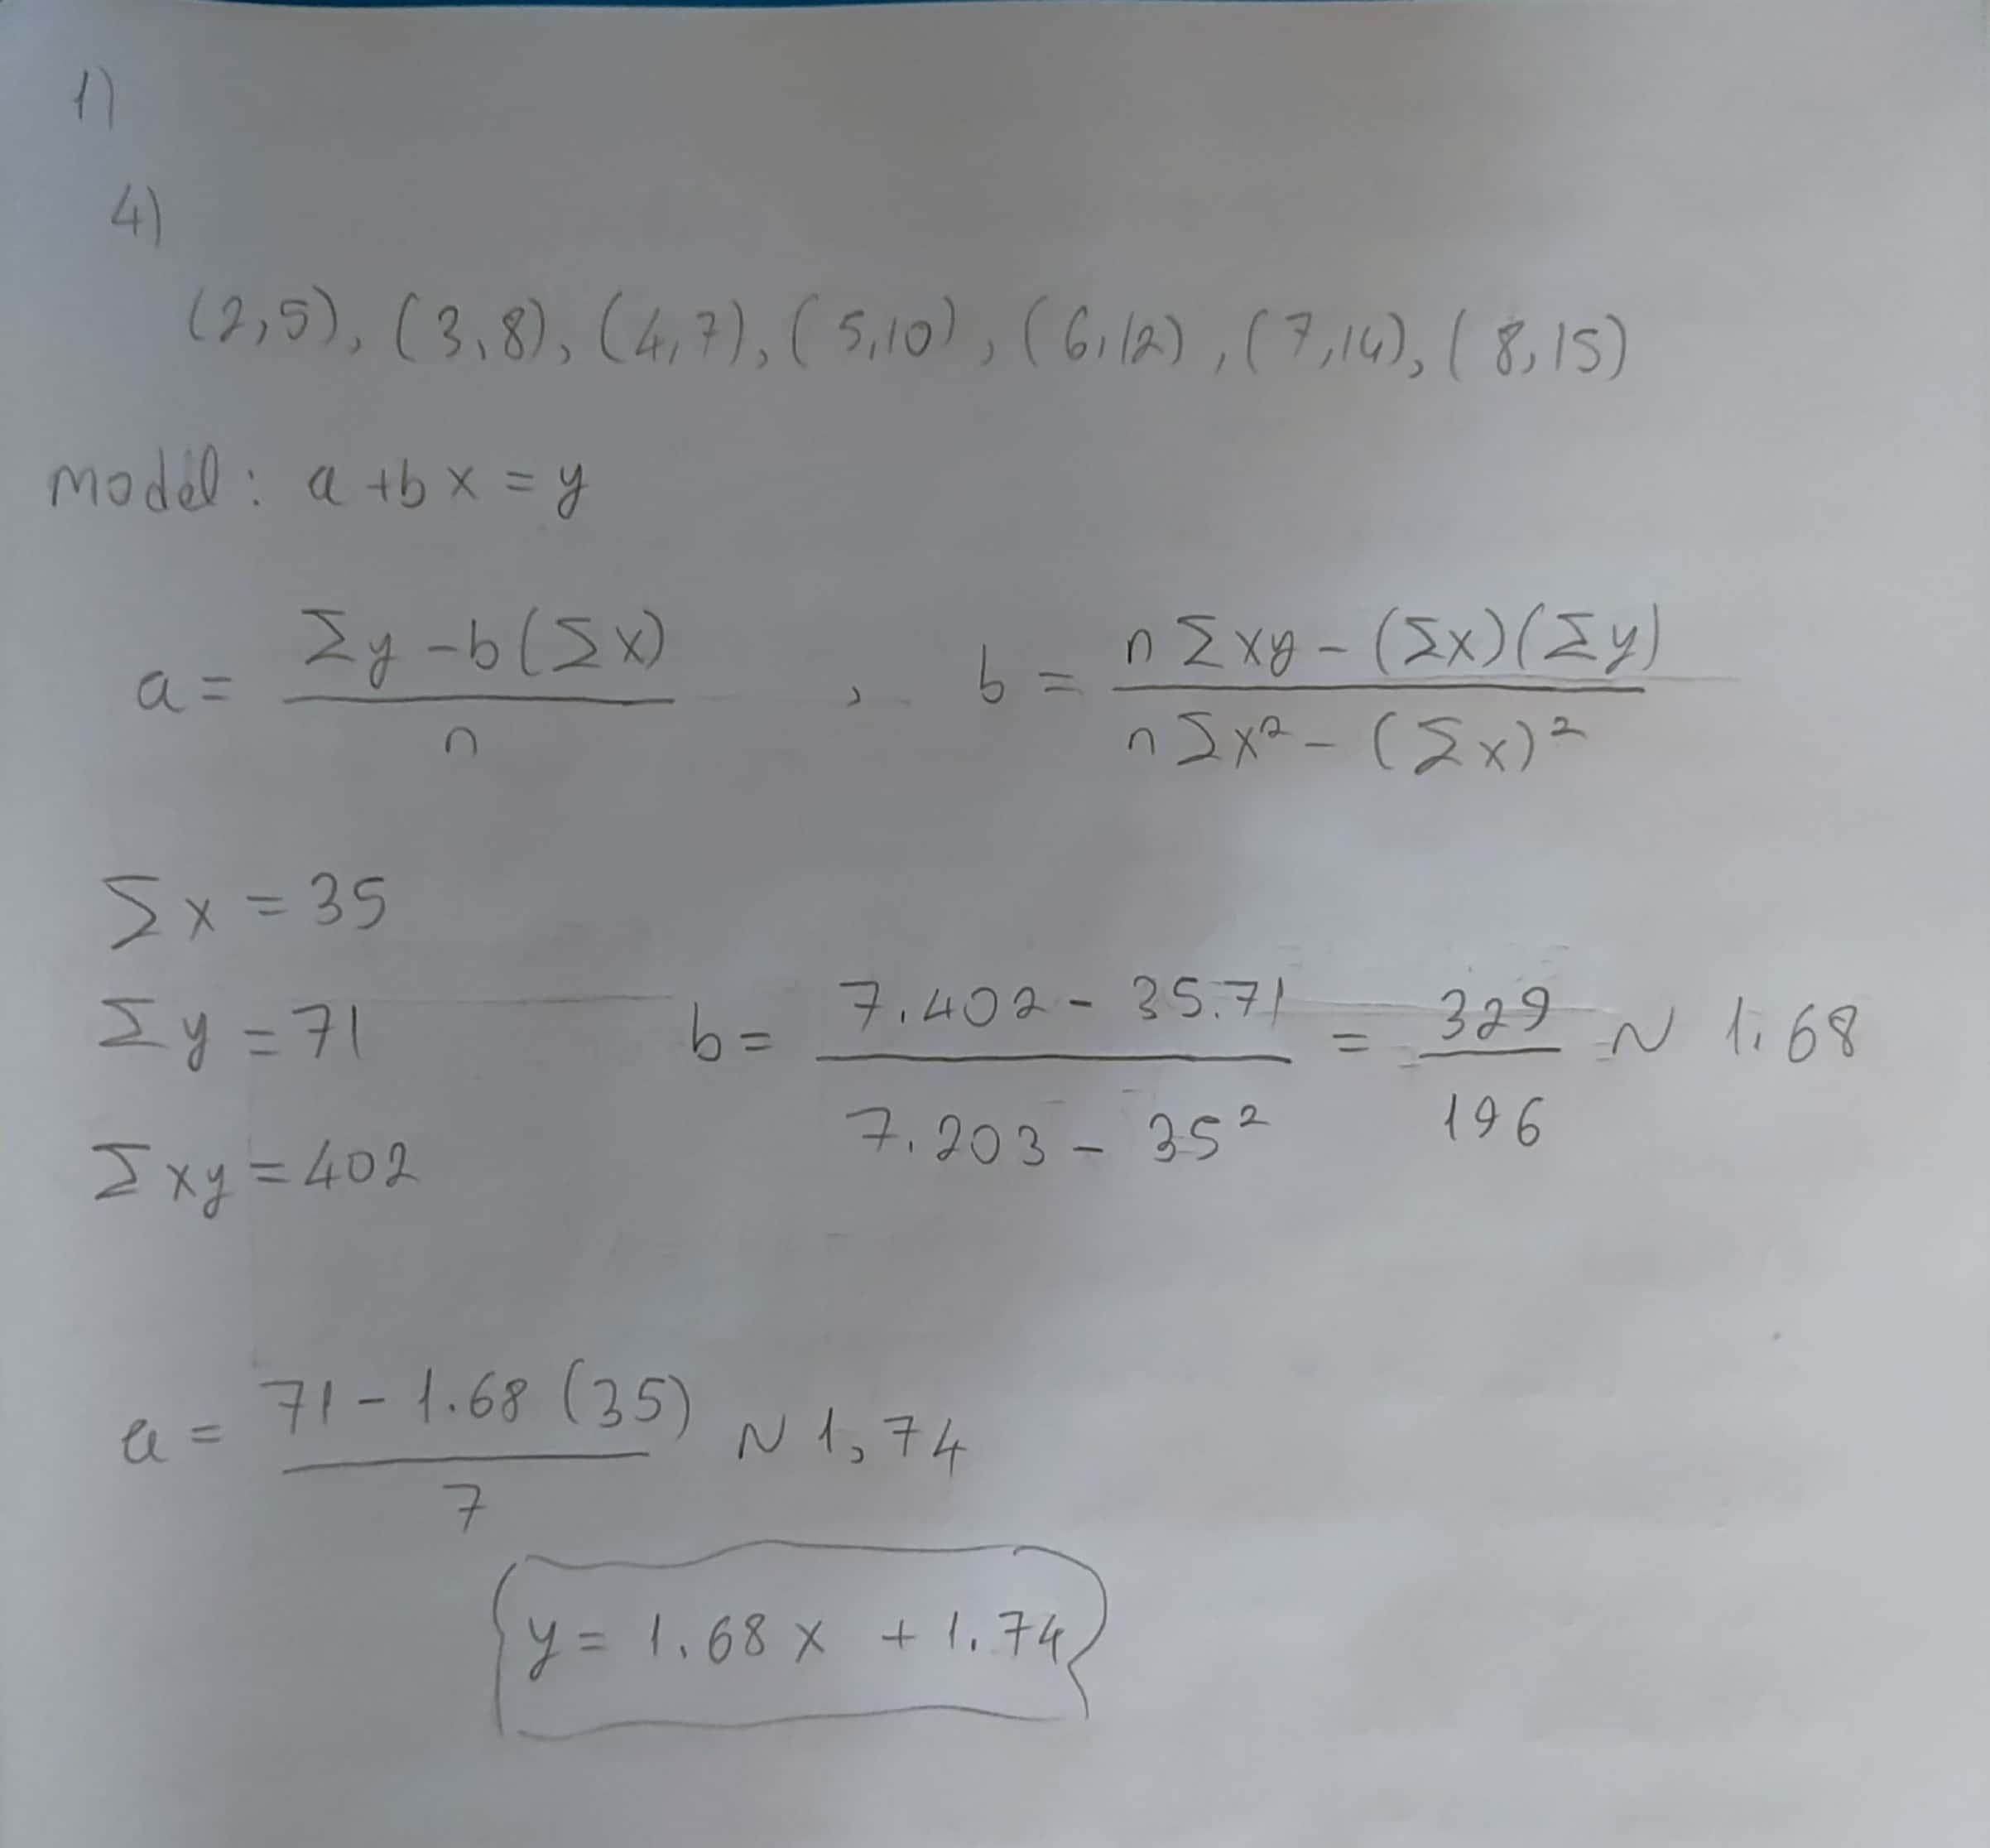

## Problem 2 (10 points)

1. Explain the concept of maximum likelihood estimation (MLE) in the context of parameter estimation. (5 points)

2. Given a dataset and a likelihood function, compute the MLE of a parameter (e.g., mean of a Gaussian distribution). (5 points)

    Likelihood function for Gaussian Distribution: $L(\mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$

    Calculate MLE of $\mu$ and $\sigma$ by finding derivatives and setting them to zero. Run below cell to generate the dataset.

In [ ]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(23)

# Generate a random dataset with 5 samples from a Gaussian distribution
mean = 5  # True mean
std_dev = 2  # Known standard deviation
sample_size = 5
dataset = np.random.normal(mean, std_dev, sample_size)

print(dataset)

mle_mean = np.sum(dataset) / sample_size
print(mle_mean) # --> MLE of mean

total_sum = 0

for data in dataset:
    total_sum += (data - mle_mean) * (data - mle_mean)

mle_variance = (total_sum / sample_size)

print(mle_variance)

[6.33397611 5.05162616 3.44476117 6.89726764 6.40334359]
5.626194936548153
1.5618645181057176


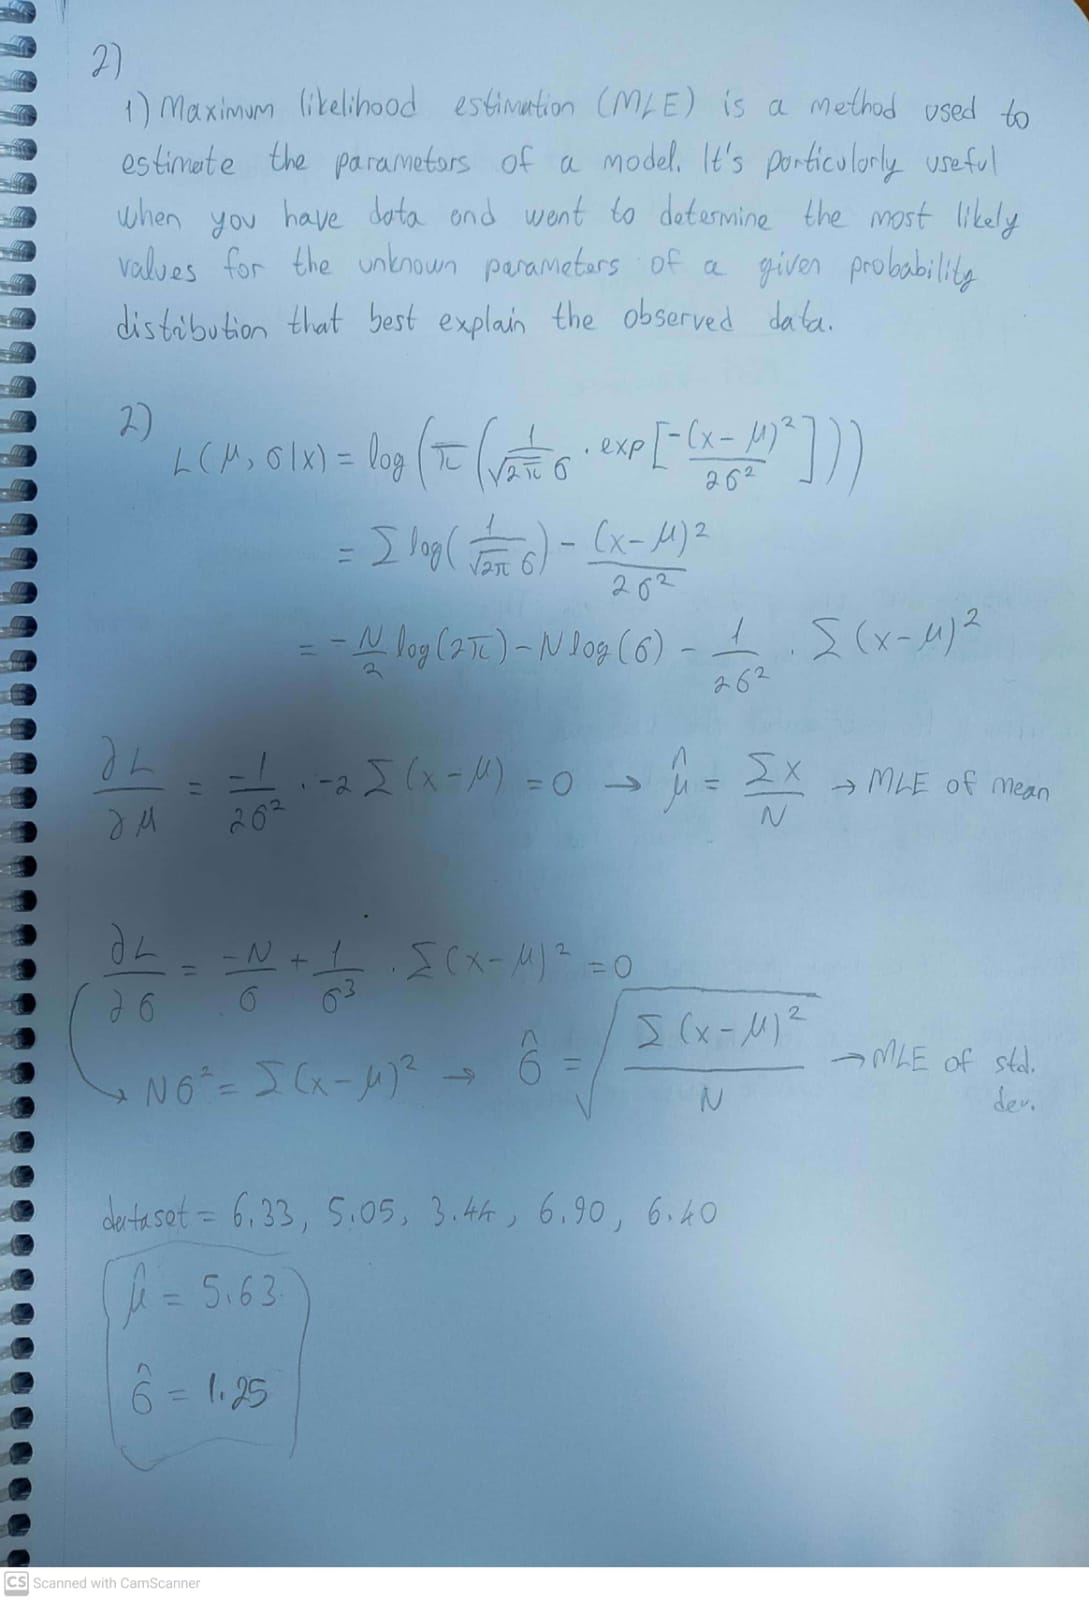

## Problem 3 (10 points)

1. Describe the principles of Bayesian decision theory in classification. (5 points)
2. You are a medical doctor working in a clinic. A patient has just undergone a medical test to determine whether they have a particular medical condition. The test has two possible outcomes: "Positive" (indicating the presence of the condition) and "Negative" (indicating the absence of the condition). The test is known to be accurate but not perfect, meaning it can produce false positive and false negative results.

    Here are the test characteristics:

    Sensitivity: The probability of the test being "Positive" when the patient has the condition is 0.95 (95% sensitivity).
    Specificity: The probability of the test being "Negative" when the patient does not have the condition is 0.90 (90% specificity).
    Given the prevalence of the medical condition in the general population, which is 0.05 (5%), you are asked to use Bayes' Rule to calculate the probability that the patient actually has the condition when the test result is "Positive." Make sure to clearly define the events before calculating the probabilities. (5 points)

    Posterior Probability: $P(C | x) = \frac{P(x | C)P(C)}{P(x)}$

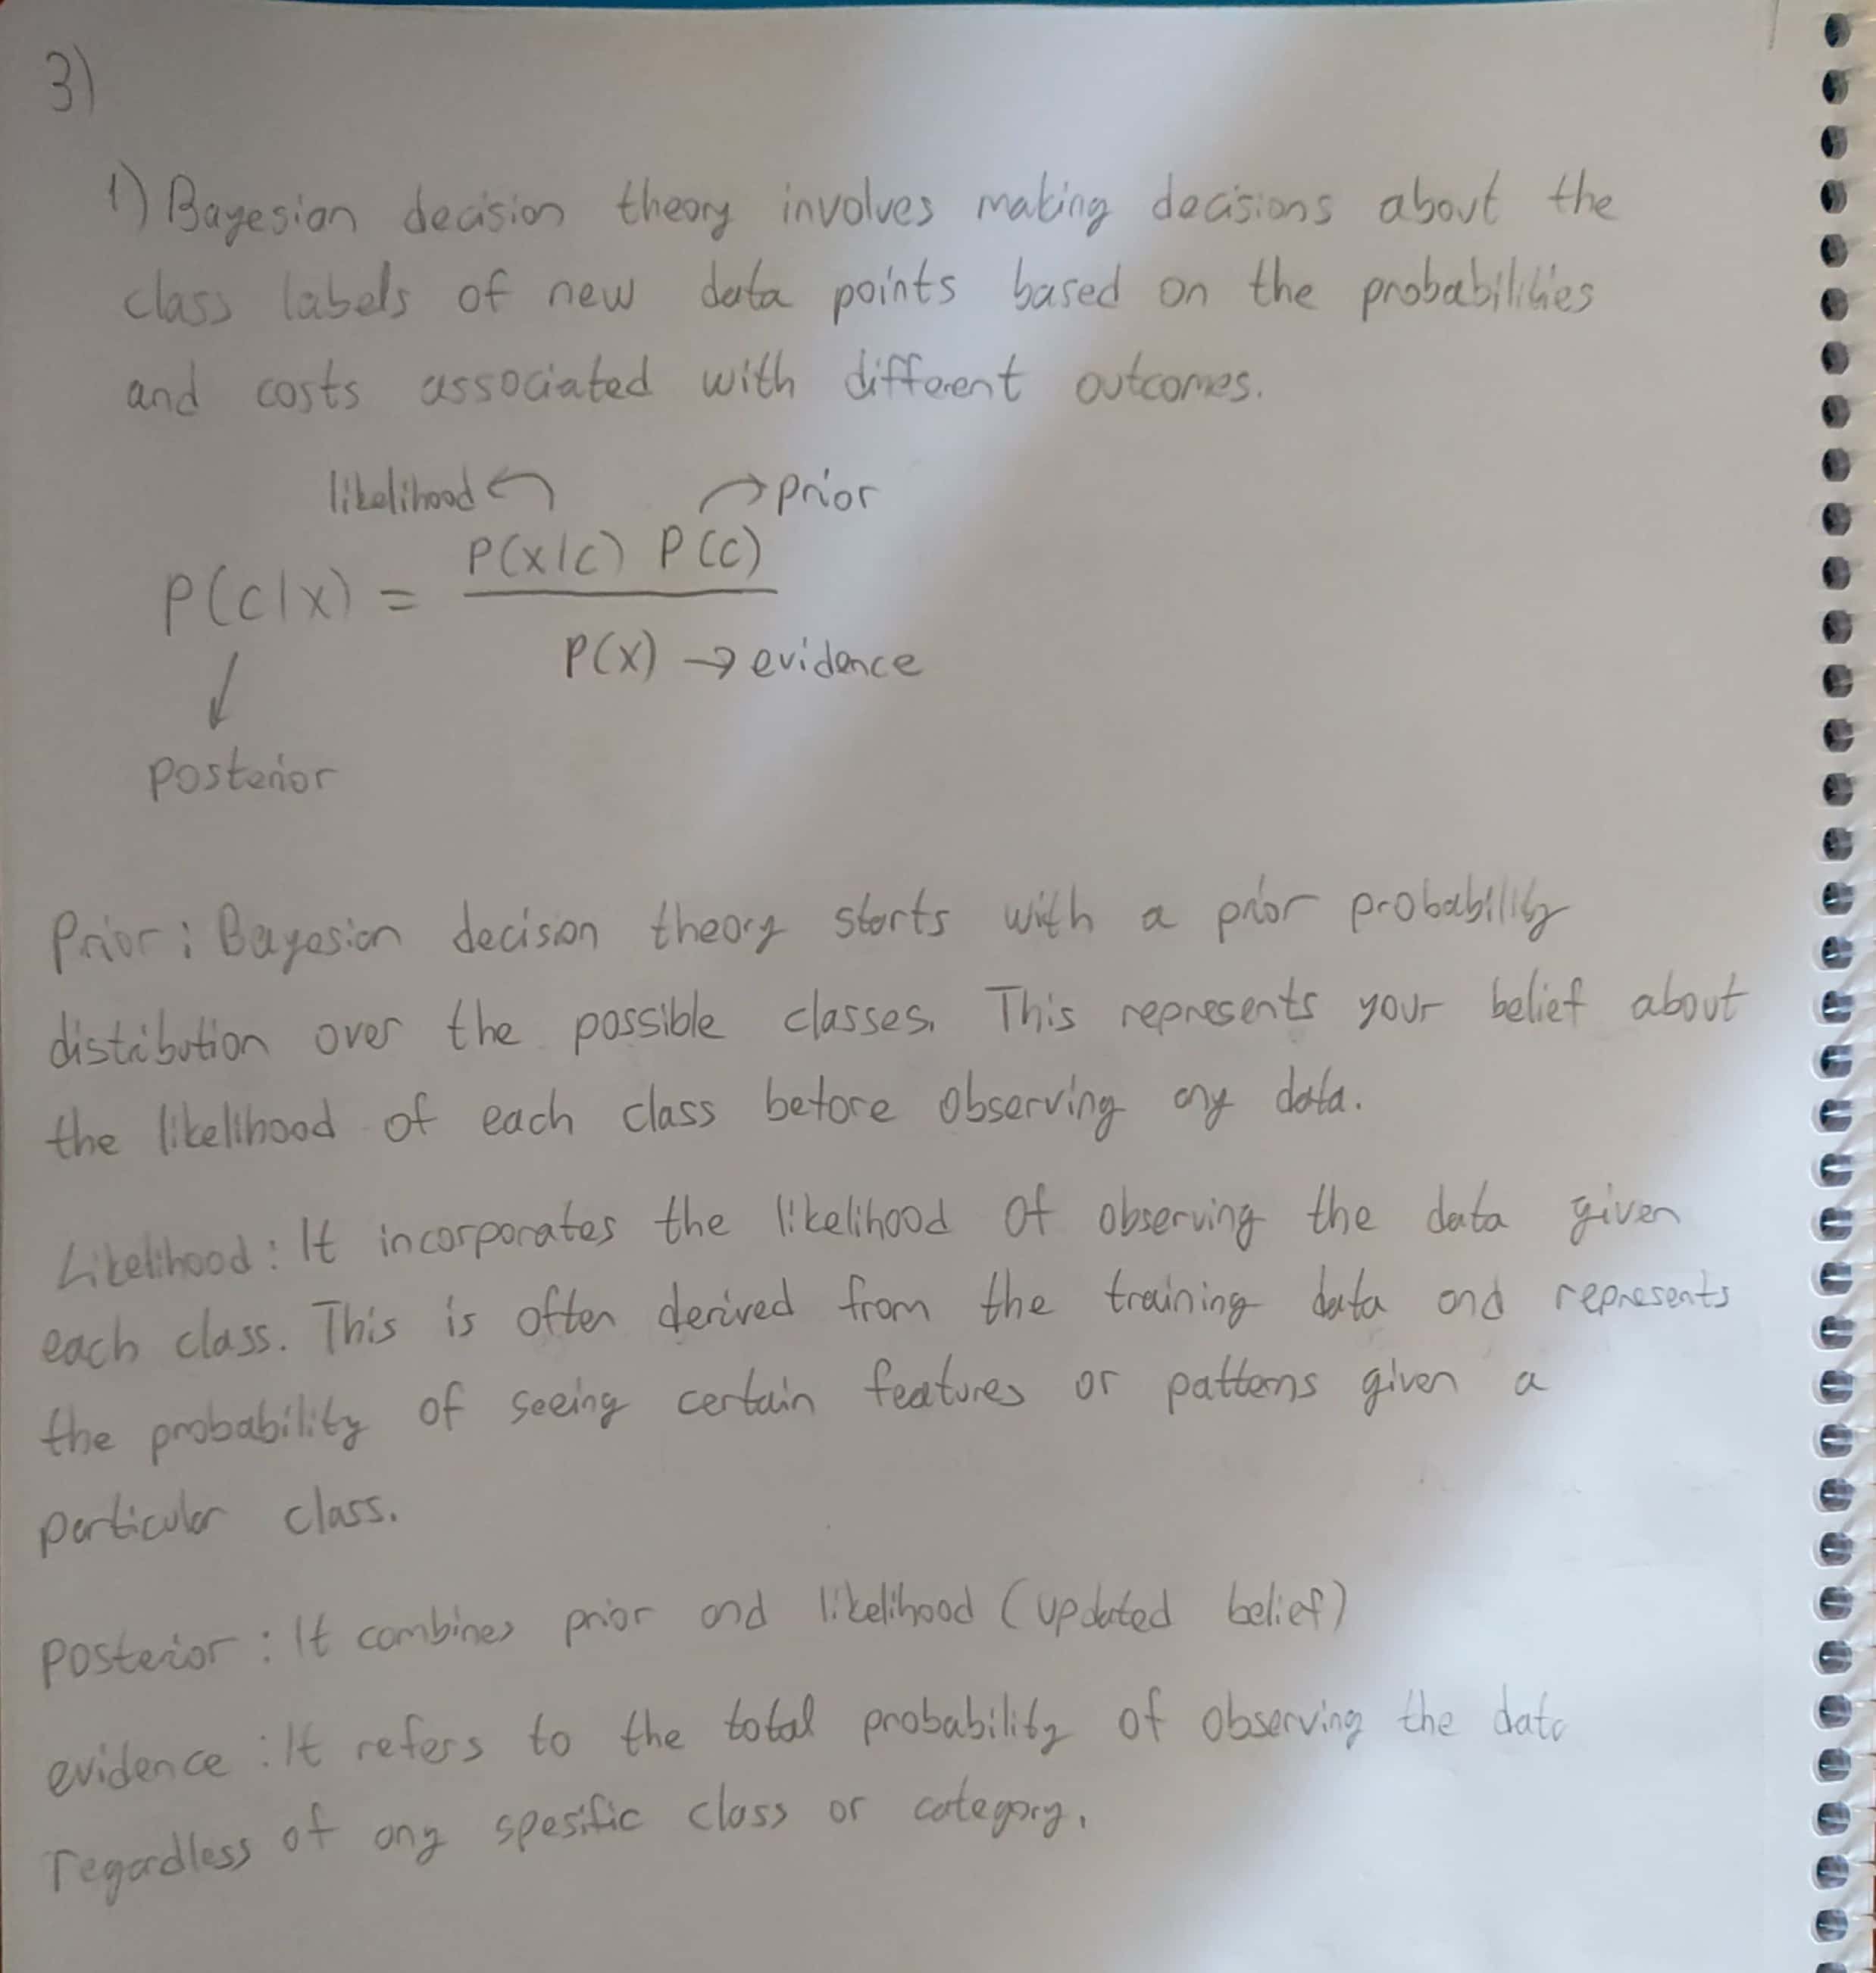

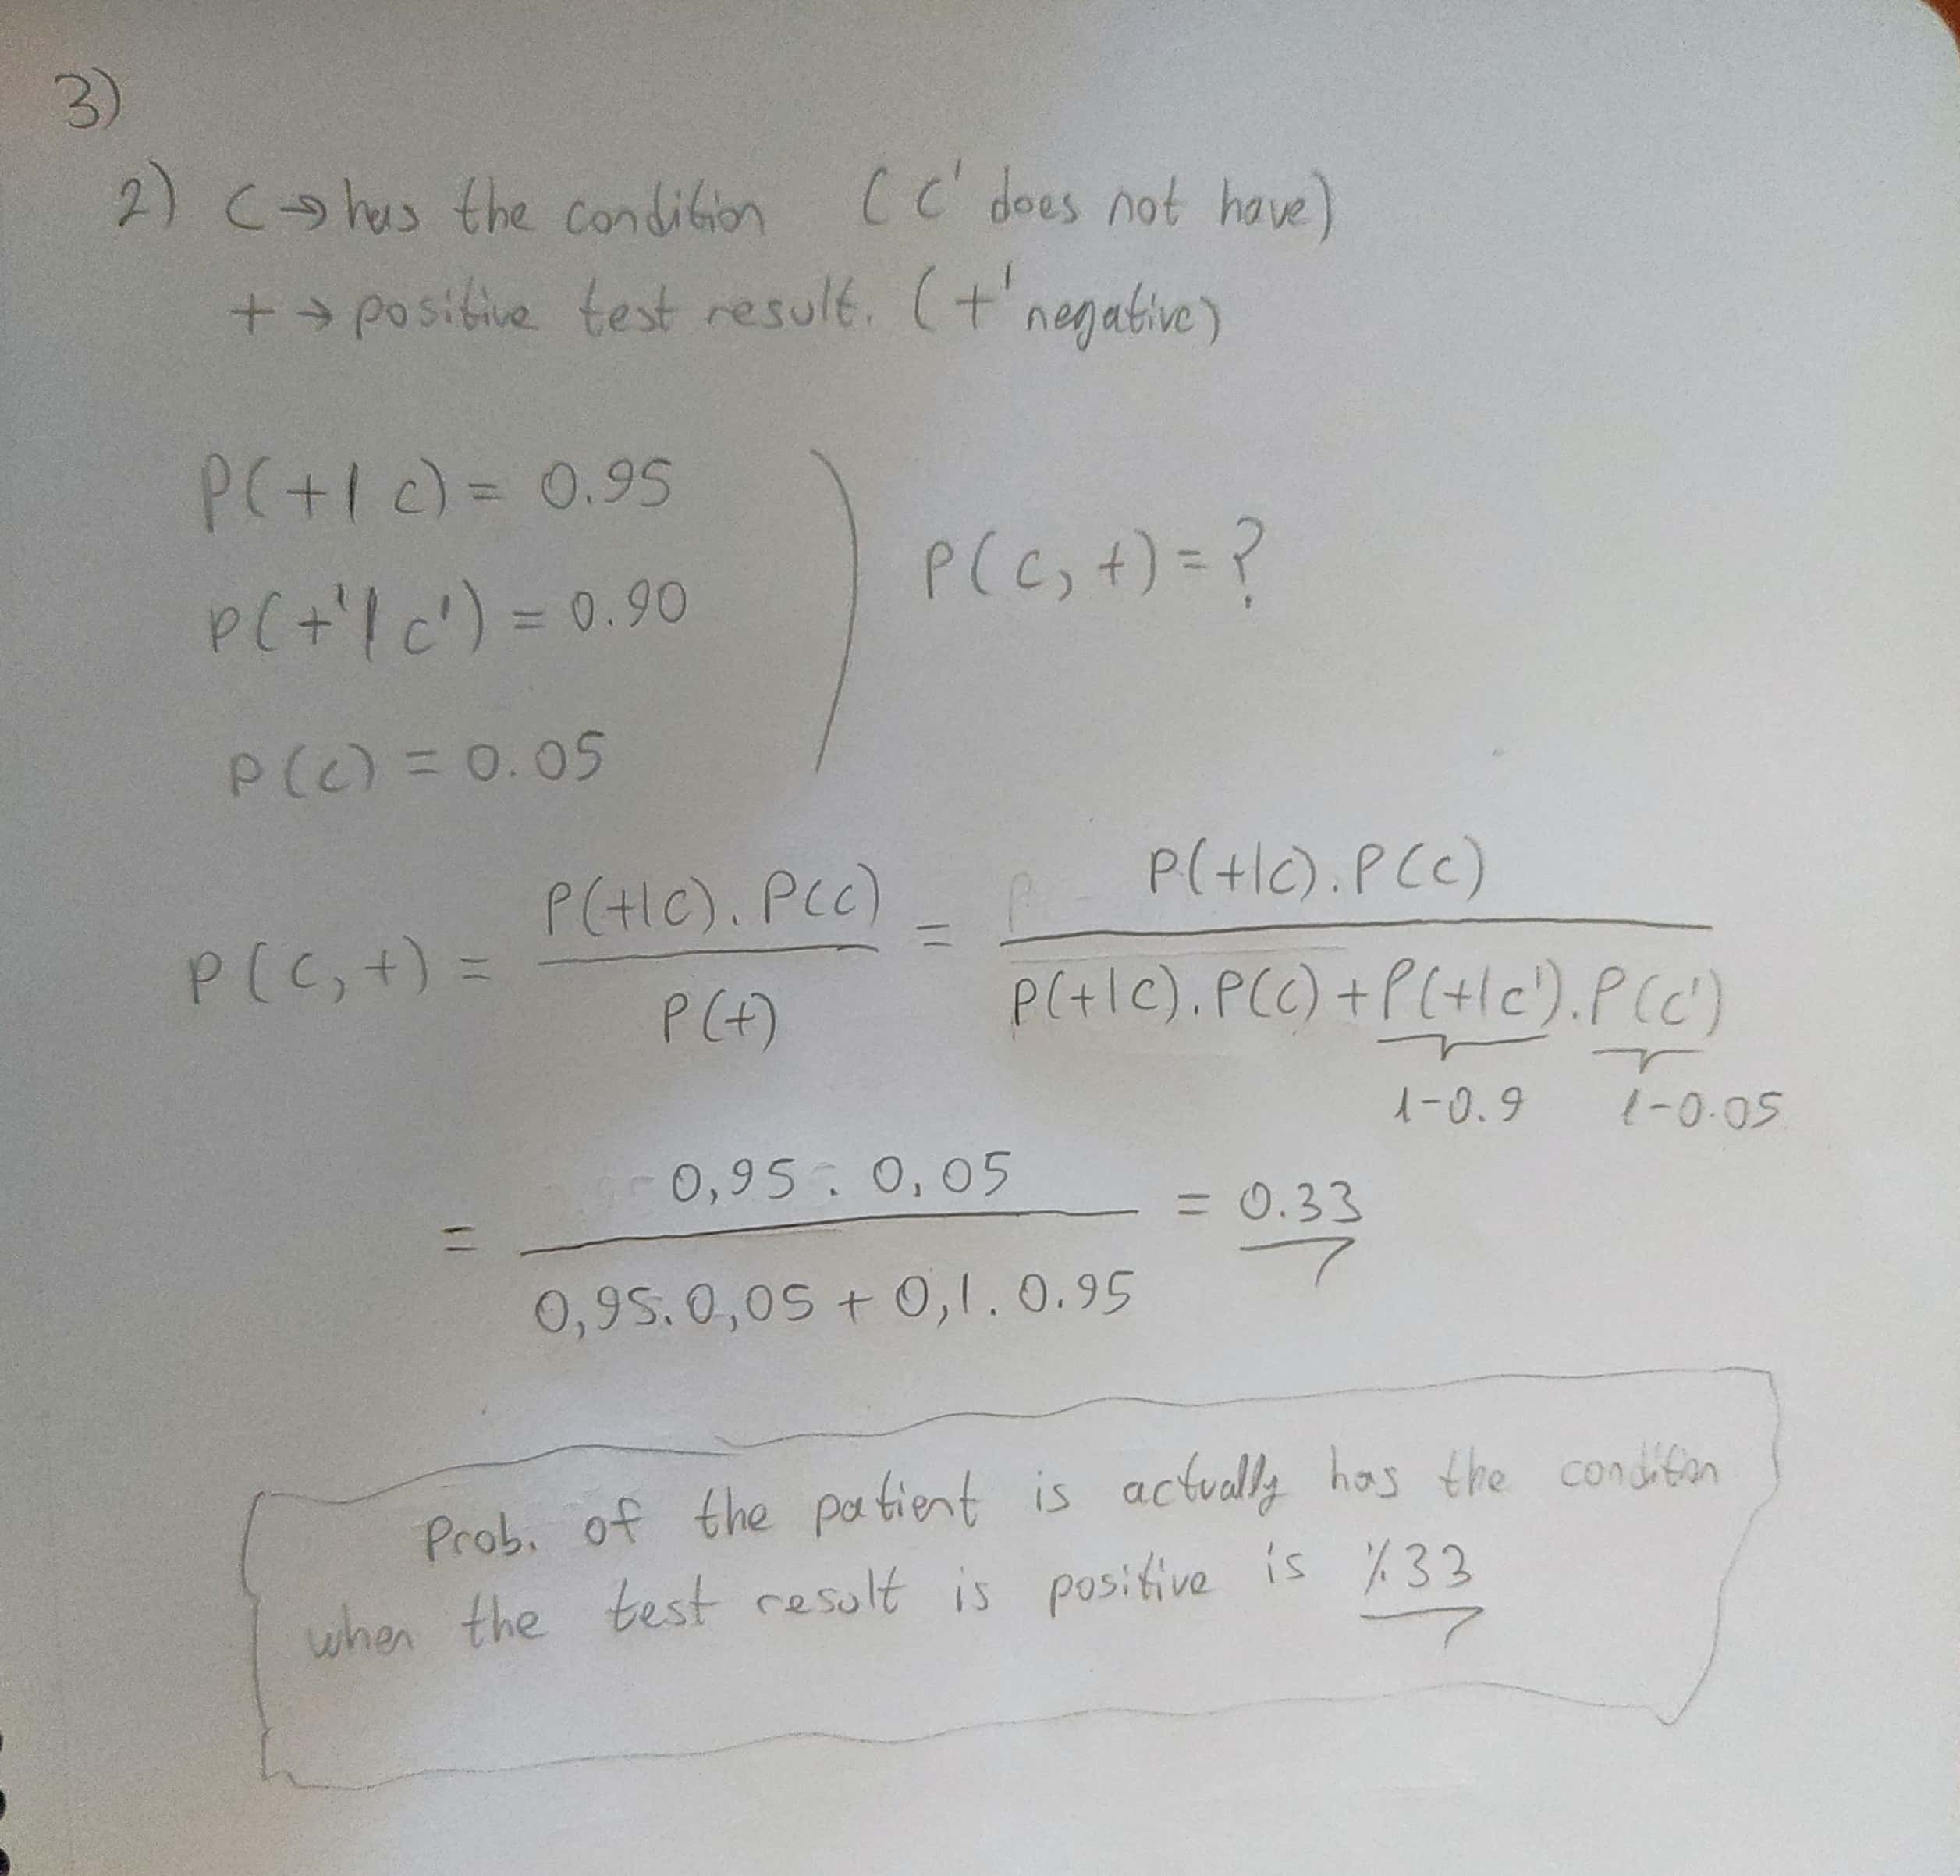

# Coding-Related Problems (60 points)

### Run below cell to import the libraries and load the Iris dataset that you will be using for the following problems (for problem 7 you will use the Digits dataset). Do not use any other libraries unless they are built in.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()


## Problem 4 (5 Points)

Implement a simple linear regression model in Python from scratch, including gradient descent for parameter estimation. (5 points)

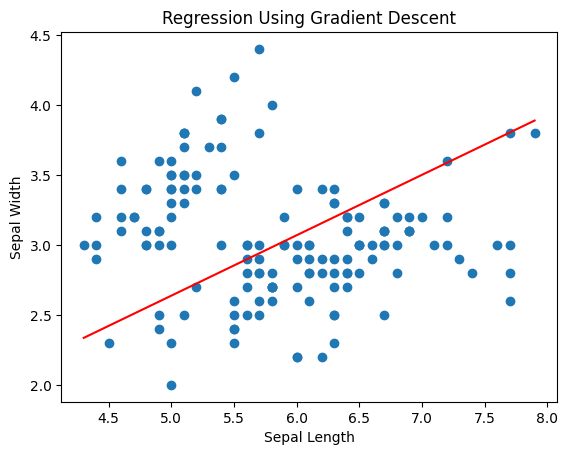

In [3]:
def simple_linear_regression(X, y, learning_rate, num_iterations):

   num_samples, num_features = X.shape

   theta = np.random.randn(num_features + 1, 1) # Initial random weights

   X_b = np.c_[np.ones((num_samples, 1)), X] # Concatenate X with column with all 1 to include bias to theta

   for i in range(num_iterations):
      gradients = 2/len(X) * X_b.T.dot(X_b.dot(theta) - y) # Gradient is calculated

      theta -= learning_rate * gradients # Theta variable is updated

   return theta

X = iris.data[:, 0] # 1d array
y = iris.data[:, 1] # 1d array
X = X.reshape(-1, 1) # Converting 1d array into d x 1 matrix
y = y.reshape(-1, 1) # Converting 1d array into d x 1 matrix

learning_rate = 0.01 # Random learning rate
n_iterations = 1000 # Random number of iterations

weights = simple_linear_regression(X, y, learning_rate, n_iterations)

plt.scatter(X, y) # Dataset points

x_values = np.linspace(min(X), max(X), 100)
predicted_y_values = weights[0] + weights[1] * x_values

plt.plot(x_values, predicted_y_values, color='red') # Line
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Regression Using Gradient Descent')
plt.show()

## Problem 5 (20 Points)

Implement a K-Nearest Neighbors (KNN) classifier in Python for a classification problem. Additionally, incorporate cross-validation to assess the model's performance.

1. Implement the KNN classifier and use k-fold cross-validation to evaluate the KNN classifier. You can specify the number of folds (e.g., 5-fold cross-validation). (5 points)
2. Calculate and report the average accuracy of the model across the cross-validation folds. (5 points)
3. Plot your classification for 3 different values of `k`. (5 points)
4. Discuss how the choice of `k` impacts the model's performance. (5 points)

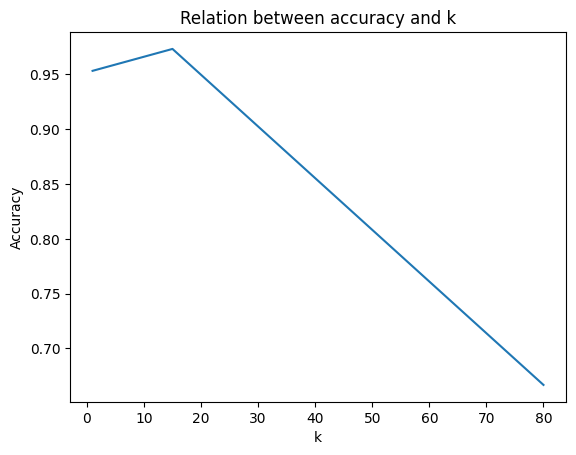

In [91]:
X_data, y_data = iris.data, iris.target

def euclidean_distance(a, b): # Function to calculate Euclidean distance between two points.
    return np.linalg.norm(a - b)

def knn_prediction(X_train, y_train, x_test, k): # Function to predict using knn algorithm.
    distances = np.array([euclidean_distance(x_test, x_train) for x_train in X_train]) # Calculate distances between the test point and training points.
    i = np.argsort(distances)[:k] # Get sorted indices of distances to find the nearest k neighbors.
    k_nearest_l = y_train[i] # Get labels of the k nearest neighbors.
    unique_l, counts = np.unique(k_nearest_l, return_counts=True) # Find unique labels and their counts among neighbors.
    most_common_l = unique_l[np.argmax(counts)] # Select the most commonly occurring label.
    return most_common_l

def knn_cross_validation(X, y, k, num_folds=5): # Function to perform k fold cross validation with knn classification.
    n_samples = len(y)
    fold_size = n_samples // num_folds
    all_indices = np.arange(n_samples)
    np.random.shuffle(all_indices)

    accuracies = []

    for fold in range(num_folds):
        start, end = fold * fold_size, (fold + 1) * fold_size

        # Split into test and training data.
        test_i = all_indices[start:end]
        train_i = np.concatenate([all_indices[:start], all_indices[end:]])

        X_test, y_test = X[test_i], y[test_i]
        X_train, y_train = X[train_i], y[train_i]

        predictions = np.array([knn_prediction(X_train, y_train, x_test, k) for x_test in X_test]) # Make predictions using knn for each test data point.

        accuracy = np.mean(predictions == y_test) # Calculate accuracy.
        accuracies.append(accuracy)

    avg_accuracy = sum(accuracies) / len(accuracies)
    return avg_accuracy

k_values = [1, 15, 80] # Perform k fold cross validation for specific k values and store accuracies.
accuracy_scores = []

for k_val in k_values:
    # Calculate accuracy using cross validation for each k value.
    avg_acc = knn_cross_validation(X_data, y_data, k_val, num_folds=5)
    # print(f"Average accuracy with k={k_val}: {avg_acc}")
    accuracy_scores.append(avg_acc)

# Plot the results
plt.plot(k_values, accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Relation between accuracy and k')
plt.show()

#### Results

Results:
Average accuracy with k=1: 0.96
Average accuracy with k=15: 0.9733333333333334
Average accuracy with k=80: 0.6666666666666667

Small k values (ex: k=1):

The model proves highly reactive to data irregularities and outliers due to its heavy reliance on the closest single neighbor. While training accuracy tends to be high, its performance on new data might be compromised.

Medium k values (ex: 5-20):

This range often serves as a solid starting point, striking a balance between capturing inherent data patterns and avoiding overfitting to noise. The resulting decision boundary tends to exhibit more smoothness compared to lower k values, contributing to better generalization.

Large k values (ex: k=50 or more):

The classifier becomes less affected by localized data variations and leans toward capturing broader patterns. However, excessively high k values may lead to an overly smoothed decision boundary, potentially overlooking crucial local patterns. This poses a risk of underfitting, particularly when dealing with complex data structures.


#### Discussions

As k grows: Bias inclines to rise, potentially resulting in an excessively smoothed decision boundary. Conversely, variance tends to decrease, aiding in mitigating overfitting. Balancing this tradeoff between bias and variance is crucial, aiming to identify a k value that offers a middle ground and ensures effective generalization for unseen data.

## Problem 6 (15 Points)

Implement a multivariate classification model using the Iris dataset and evaluate its performance. Use logistic regression as the classification model.

**Steps:**

1. Train and evaluate the model. You can specify train ratio. (5 points)
2. Calculate and report classification metrics such as accuracy, precision, recall, and F1-score to assess the model's performance. (5 points)
3. Discuss the results. (5 points)

In [ ]:
def initialize_weights(n_features, n_classes):  # Initialize weights as zeros in a matrix shape (n_features, n_classes)
    return np.zeros((n_features, n_classes))  # Return a matrix of zeros for weights initialization

def add_intercept(X):  # Add an intercept column with all ones to the input matrix X
    intercept_column = np.ones((X.shape[0], 1))
    return np.concatenate((intercept_column, X), axis=1)  # Return X with added intercept column

def softmax(z):  # Compute softmax values for each set of scores in z
    # Calculate exponentials of input scores while preventing numerical instability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Return softmax probabilities

def train_test_split_custom(X, y, train_ratio=0.8):  # Custom train and test split function
    data_size = len(X)
    split_i = int(train_ratio * data_size)

    # Shuffle indices for random splitting
    shuffled_i = np.random.permutation(data_size)
    train_i, test_i = shuffled_i[:split_i], shuffled_i[split_i:]

    # Split the data based on shuffled indices
    X_train, y_train = X[train_i], y[train_i]
    X_test, y_test = X[test_i], y[test_i]

    return X_train, X_test, y_train, y_test  # Return split train and test data

def logistic_regression(X, y, learning_rate=0.01, epochs=1000):  # Implementation of logistic regression training
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))
    X = add_intercept(X)
    weights = initialize_weights(num_features + 1, num_classes)

    # Gradient descent optimization loop
    for epoch in range(epochs):
        z = np.dot(X, weights)
        predictions = softmax(z)

        one_hot_y = np.eye(num_classes)[y]
        error = predictions - one_hot_y
        gradients = np.dot(X.T, error) / num_samples

        weights -= learning_rate * gradients  # Update weights using gradients

    return weights  # Return learned weights

def predict(X, weights):  # Make predictions using learned weights
    X = add_intercept(X)
    z = np.dot(X, weights)
    predictions = softmax(z)
    return np.argmax(predictions, axis=1)  # Return predicted class labels

def evaluate(y_true, y_pred, num_classes):  # Evaluate model performance by accuracy, precision, recall, and F1 score
    accuracy = np.mean(y_true == y_pred)  # Calculate accuracy

    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1  # Construct confusion matrix

    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)

    for i in range(num_classes):
        true_positive = confusion_matrix[i, i]
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        false_negative = np.sum(confusion_matrix[i, :]) - true_positive

        # Calculate precision, recall, and F1 score for each class
        precision[i] = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
        recall[i] = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
        f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

    return accuracy, precision.mean(), recall.mean(), f1.mean()  # Return evaluation metrics

def logistic_regression_classifier(X, y, train_ratio=0.8):  # Train logistic regression model and evaluate its performance
    X_train, X_test, y_train, y_test = train_test_split_custom(X, y, train_ratio)

    weights = logistic_regression(X_train, y_train)  # Train logistic regression model

    y_pred = predict(X_test, weights)  # Make predictions using the trained model

    num_classes = len(np.unique(y))
    accuracy, precision, recall, f1 = evaluate(y_test, y_pred, num_classes)  # Evaluate model performance

    return accuracy, precision, recall, f1  # Return evaluation metrics

accuracy, precision, recall, f1 = logistic_regression_classifier(X, y)  # Evaluate and store model performance

print("accuracy:", accuracy)  # Print accuracy
print("precision:", precision)  # Print precision
print("recall:", recall)  # Print recall
print("f1_score:", f1)  # Print f1 score

#### Results

Results:
accuracy: 0.9666666666666667
precision: 0.9629629629629629
recall: 0.9743589743589745
f1_score: 0.9670588235294119

#### Discussions


The obtained results showcase the robust performance of logistic regression on the dataset. These metrics reflect the model's high performance across various measures such as accuracy, precision, recall, and the F1 score.

Accuracy (96.67%) indicates that roughly 96.67% of the model's predictions across all classes were correct. This suggests a strong overall ability of the model to make accurate predictions.

Precision (96.30%) reveals that approximately 96.30% of the items identified as positive by the model were indeed true positives. This indicates that the majority of items flagged as positive by the model were accurate.

Recall (97.44%) signifies that around 97.44% of the actual positives were correctly identified by the model. It reflects the model's capability to capture a significant portion of the true positive instances.

F1 score (96.71%) represents the harmonic mean of precision and recall. This score, around 96.71%, demonstrates a balanced performance between precision and recall, showcasing the model's ability to maintain both high precision and recall.

## Problem 7 (20 Points)

Implement Principal Component Analysis (PCA) in Python for dimensionality reduction. Additionally, incorporate cross-validation to evaluate the performance of PCA for different numbers of principal components. You will use the Digits dataset given below.

**Steps:**

1. Implement the PCA algorithm and use k-fold cross-validation to assess the impact of the number of principal components on the model's performance. (5 points)
2. Calculate and report the average performance metric (e.g., mean squared error) across the cross-validation folds for each choice of the number of principal components. (5 points)
3. Calculate and report the percentage of variance explained after applying PCA. (5 points)
4. Discuss the trade-off between dimensionality reduction and model performance. (5 points)

In [4]:
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()

In [ ]:
X = digits.data
y = digits.target

def pca_with_cv(X, y, n_components, num_folds=5):
    mse_scores = []
    fold_size = len(y) // num_folds

    # Shuffle the data indices
    indices = np.arange(len(y))
    np.random.shuffle(indices)

    for i in range(num_folds):
        # Split indices into training and testing sets for cross validation
        test_i = indices[i * fold_size: (i + 1) * fold_size]
        train_i = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, X_test = X[train_i], X[test_i]
        y_train, y_test = y[train_i], y[test_i]

        # centering the mean
        mean = np.mean(X_train, axis=0)
        X_train_centered = X_train - mean
        X_test_centered = X_test - mean

        # Calculate covariance matrix
        covariance_matrix = np.cov(X_train_centered, rowvar=False)

        # Perform eigen decomposition on covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort eigenvalues and corresponding eigenvectors
        sorted_i = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_i]
        sorted_eigenvectors = eigenvectors[:, sorted_i]

        # Select top k eigenvectors based on n_components
        top_eigenvectors = sorted_eigenvectors[:, :n_components]

        # Project the data onto the selected components
        X_train_pca = np.dot(X_train_centered, top_eigenvectors)
        X_test_pca = np.dot(X_test_centered, top_eigenvectors)

        model = np.linalg.lstsq(X_train_pca, y_train, rcond=None)[0]
        y_pred = np.dot(X_test_pca, model)

        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)

    avg_mse = np.mean(mse_scores)
    return avg_mse

n_components_values = [2, 4, 8, 16]

# Calculate average mse for different numbers of components using 5 fold cross validation
for n_components in n_components_values:
    avg_mse = pca_with_cv(X, y, n_components)
    print(f"n_of_components: {n_components}")
    print(f"average_mse: {avg_mse:.4f}\n")


#### Results

n_of_components: 2
average_mse: 28.2422

n_of_components: 4
average_mse: 28.0824

n_of_components: 8
average_mse: 25.5094

n_of_components: 16
average_mse: 24.8842


#### Variance

#### Discussion

The PCA analysis explores how the Mean Squared Error (MSE) changes with different numbers of principal components. Initially, using only 2 components yields a higher MSE, indicating insufficient information for the model. As the components increase to 8, there's a notable drop in MSE, suggesting improved model representation. However, beyond 8 components, the MSE improvement becomes marginal, implying diminishing returns in enhancing model performance. This underlines the importance of finding an optimal balance between dimensionality reduction and model accuracy, with around 8 components showcasing a significant improvement without excessive complexity. Fine tuning the component selection could refine this balance further.